## The Data

Let's use a dataset from the UCI Machine Learning Repository that contains different size NACA 0012 airfoils that were exposed to various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

The dataset has the following attributes.
These are the inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels. 

Source: [Airfoil Self-Noise Data Set](http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)

In [1]:
import pandas as pd
from sklearn import linear_model
import sklearn.linear_model     #for linear regression.
import sklearn.preprocessing    #for preprocessing like imputing missing values.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc("font", size = 14)      #for customization just like .vimrc
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("airfoil_self_noise.dat", sep = "\t", names = ['Frequency(Hz)',
                                                                    'Angle(deg)', 
                                                                    'Chord(m)', 
                                                                    'Velocity(m)', 
                                                                    'Suction(m)', 
                                                                    'Pressure(dec)'])

In [4]:
#data.columns = ['Frequency(Hz)',
#                                                                    'Angle(deg)', 
#                                                                    'Chord(m)', 
#                                                                    'Velocity(m)', 
#                                                                    'Suction(m)', 
#                                                                    'Pressure(dec)']

In [5]:
data.head(2)

,Frequency(Hz),Angle(deg),Chord(m),Velocity(m),Suction(m),Pressure(dec)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [6]:
data.shape

(1503, 6)

### Explore the data

In [7]:
data.describe()

,Frequency(Hz),Angle(deg),Chord(m),Velocity(m),Suction(m),Pressure(dec)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


### Visualize the data

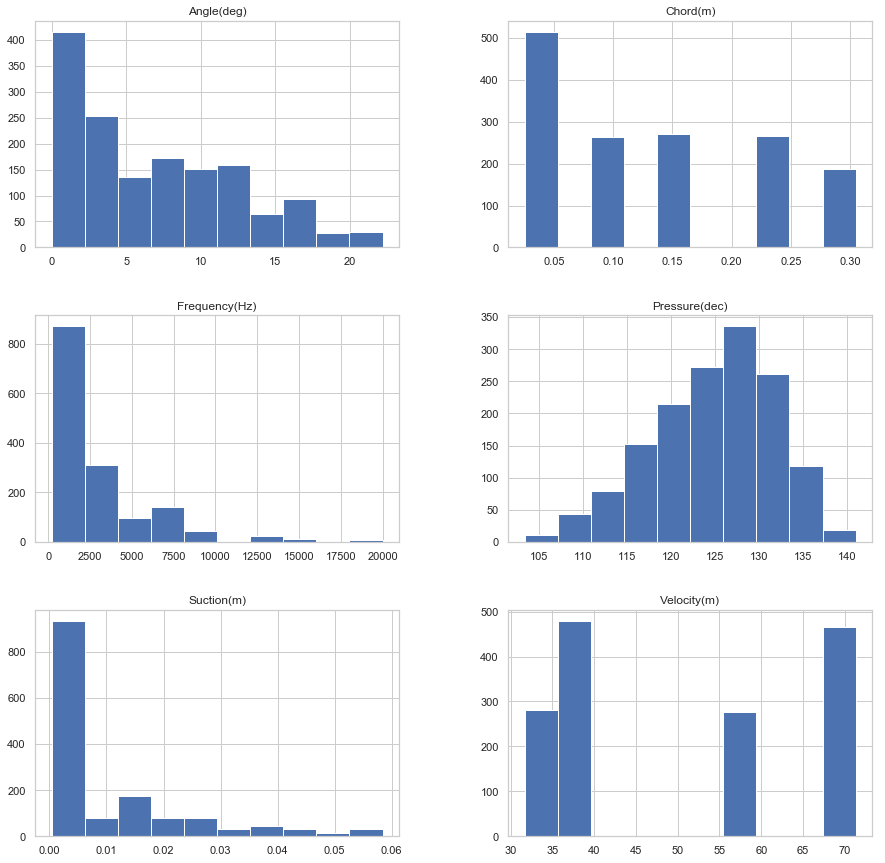

In [8]:
data.hist(figsize=(15,15));

### Split data into training and test sets

Firstly, divide dataset into predictor variables and outcome variable.

In [9]:
X = data.drop(['Pressure(dec)'], axis = 1).values # X are he input (or independent) variables
y = data['Pressure(dec)'].values # Y is output (or dependent) variable

Now split the data into `training` and `test` sets  by `80/20` or `70/30`.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #we using 20% of the data to perfom tests

In [12]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(1202, 5) (1202,)
(301, 5) (301,)


## Fit the Model

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

## Make Predictions

remember we trying to predict the dependent using independent variable

In [14]:
predictions = lm.predict(X_test) #note USE X_test

In [15]:
print(predictions[0:5]) # print the first 5 predictions

[123.13623023 126.54555289 129.92890903 116.43031766 130.60921485]


## Plot the model

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predictions')

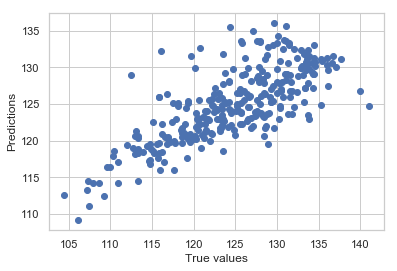

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel("True values")
plt.ylabel("Predictions")

## Score The Model

In [18]:
#Determine model accuracy
print("Score: ", model.score(X_test, y_test)) 

Score:  0.5566391057720119


# =============================================================

# Logistic Regression

Classification


We now look at how to build a classifier, here a binary classifier, that classifies data points into two classes, 0 or 1.

### The data

The data is experimental data that we'll use to determine room occupancy depending on the temperature, humidity, light and CO2 levels in a room. 
Source: [UCI Machine Learning Repository: Occupancy Detection Data Set](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+).

### The Goal    

Predict whether a room is occupied or not given the `temperature`, `humidity`, `light`, `carbon dioxide` and `humidity ratio`. We'll use logistic regression to solve this problem.

### Load Data

In [19]:
df = pd.read_csv("datatraining.txt", sep=",")

### Explore Data

In [20]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [21]:
df.shape

(8143, 7)

Because this is time series data and we're not particularly interested in analyses over time, drop the `date` column.

In [22]:
df.drop(['date'], axis=1, inplace=True) #axis=1 for droping a column, inplace has to be True in order for the column to go

In [23]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [24]:
df.isnull().sum() #we have no missing values

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [25]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


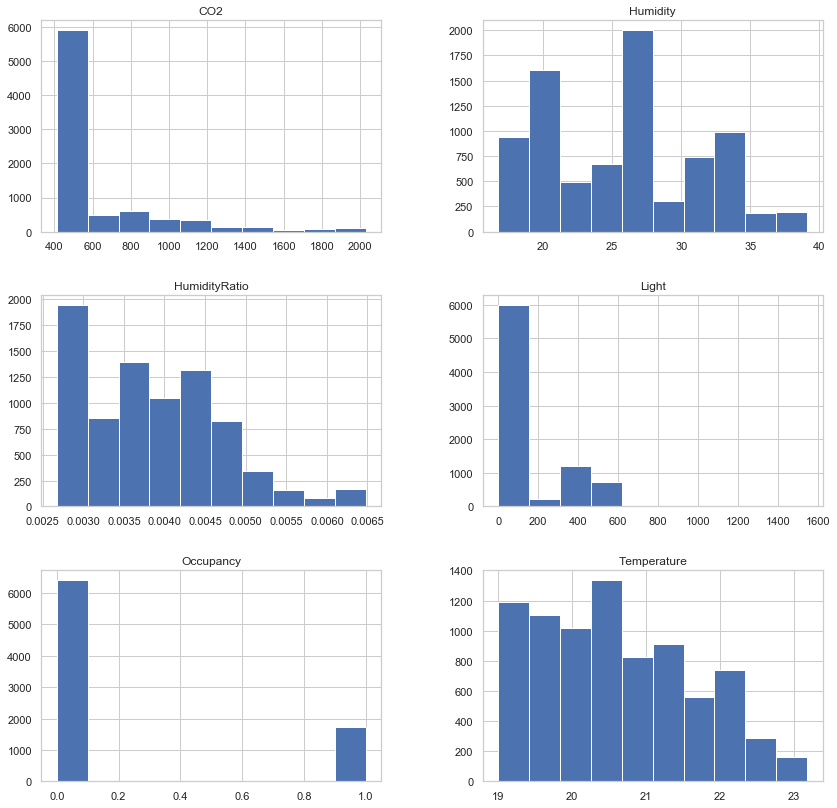

In [26]:
df.hist(figsize=(14,14));

In [27]:
df.groupby('Occupancy').count()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,6414,6414,6414,6414,6414
1,1729,1729,1729,1729,1729


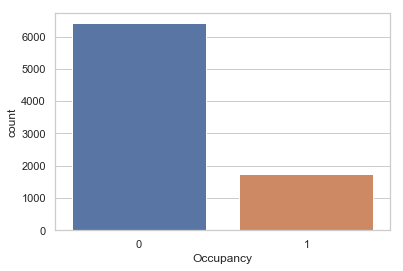

In [28]:
sns.countplot('Occupancy', data=df)

### Import the libraries

Import the logistic regression module and metrics module for evaluating.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [30]:
#Put data into matrices
X = df.drop(['Occupancy'], axis = 1).values # X are the input (or independent) variables
y = df['Occupancy'].values # Y is output (or dependent) variable

In [31]:
print(X[0:5])
print('\n')
print(y[0:5])

[[2.31800000e+01 2.72720000e+01 4.26000000e+02 7.21250000e+02
  4.79298818e-03]
 [2.31500000e+01 2.72675000e+01 4.29500000e+02 7.14000000e+02
  4.78344095e-03]
 [2.31500000e+01 2.72450000e+01 4.26000000e+02 7.13500000e+02
  4.77946352e-03]
 [2.31500000e+01 2.72000000e+01 4.26000000e+02 7.08250000e+02
  4.77150883e-03]
 [2.31000000e+01 2.72000000e+01 4.26000000e+02 7.04500000e+02
  4.75699293e-03]]


[1 1 1 1 1]


### Feature selection

In [32]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination

In [33]:
logreg = LogisticRegression(solver='lbfgs') #create a model

In [34]:
selector = RFE(logreg, n_features_to_select=5) #defaults to half the features but we have 5 features, let's use them all
selector = selector.fit(X,y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


In this case all the predictor features or independent variables are equally important in predicting the output variable. So we use all the predictor features.

### Split into training and test datasets

We split the data 70-30; i.e., 70% for training and 30% for testing the model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [36]:
print("Training Data ", len(X_train), len(y_train))
print("Test Data ", len(X_test), len(y_test))

Training Data  5700 5700
Test Data  2443 2443


### Fit the model

In [37]:
logreg = LogisticRegression(solver='lbfgs')
model = logreg.fit(X_train, y_train)

### Predicting with the model
We predict using the test dataset.

In [38]:
y_pred = logreg.predict(X_test) 

### Score the model

In [39]:
print("Accuracy Score ", logreg.score(X_test, y_test))

Accuracy Score  0.9893573475235367


### Cross validation

We can determine whether the model generalises well by using Cross-Validation, We do cross validation to avoid overfitting. 


We use a method called `k-Folds` cross validation. We divide the training set into k subsets For each k fold, build the model on  `𝑘−1`  folds; test on the  𝑘 th fold. Record the error when the model is fitted. This is an iterative process. So repeat until each of the  𝑘  folds has served as a test set. The average of each of the k-recorded errors is the cross-validation error and is the performance metric.

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
CrossVal = KFold(n_splits=10)
CrossVal

KFold(n_splits=10, random_state=None, shuffle=False)

In [58]:
logreg = LogisticRegression(solver='lbfgs')
results = cross_val_score(logreg, X_train, y_train, cv=CrossVal, scoring='accuracy')

In [46]:
print(results)

[0.98070175 0.97719298 0.97894737 0.9877193  0.99298246 0.98596491
 0.99122807 0.99298246 0.99298246 0.98596491]


In [56]:
print("10-fold cross validation average accuracy: %.3f " % (results.mean()))

10-fold cross validation average accuracy: 0.987 


<b>The results is close to the training accuracy, so we can say the model is good on generilizing 

### Confusion matrix

We use a confusion matrix to show how many data points were correctly classified and how many were misclassified.

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1897   24]
 [   2  520]]


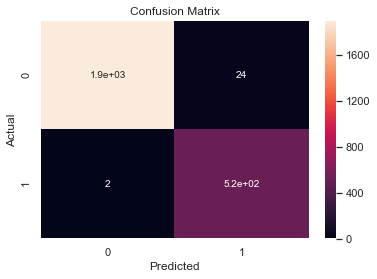

In [89]:
#ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True); # annot=True to annotate cells i.e., put numbers in cells
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

In [92]:
print('Test Data: ', len(y_test))

Test Data:  2443


### Precision, Recall and F-1 score

Precision returns the ratio of true positives (i.e., the 00 cell in the confusion matrix, in which tests indicates that the results exists when in fact it does.) That is, $$Precision = \dfrac{\text{true positive}}{\text{true positive + false positive.}}$$ This is the ability of the model to label data points correctly.

The recall rate is is given as $$Recall = \dfrac{\text{true positive}}{\text{true positive + false negative}}.$$ This is the ability of the model to find all the positive (see reference).

The F-1 score is a weighted harmonic mean of the precision and recall. See [Harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean).

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1921
           1       0.96      1.00      0.98       522

   micro avg       0.99      0.99      0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443

